In [91]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy.interpolate import UnivariateSpline


211027-pLipA-40000x.csv
Max: 21.76
211027-mLipA-3000x.csv
Max: 30.25


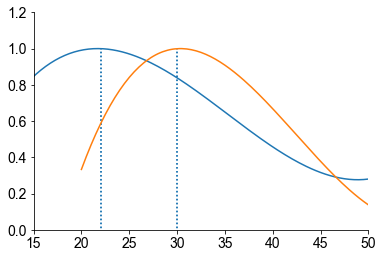

In [92]:
datasets=("211027-pLipA-40000x.csv","211027-mLipA-3000x.csv")#,"211026-blank.csv")
plt.rcParams['font.size'] = '14'
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#datasets=("pLipA.csv","mLipA.csv")
for dataset in datasets:
    print(dataset)
    absorbances=np.genfromtxt(dataset,delimiter=",")
    sorteddataset=absorbances[absorbances[:,2].argsort()]
    X=sorteddataset[:,2]
    Xtrunc=np.where(X<40)
    Y=sorteddataset[:,3]
    gradient=np.column_stack((X,Y))
    Ygradient=np.gradient(gradient,axis=0)[:,1]
    #print(np.max(Ygradient))
    Ygradientnorm=Ygradient*(1/np.max(Ygradient))
    Ysplines=UnivariateSpline(X,Ygradient)#,s=0.45)
    Ysplinesnorm=Ysplines(X)*(1/np.max(Ysplines(X)))
    smoothdataset=np.column_stack((X,Ysplinesnorm))
    maxrow,maxcol= np.where(smoothdataset == 1)
    print("Max: %s" % smoothdataset[maxrow][:,0][0])
    #plt.plot(X,Y,label=dataset)
    #plt.plot(X,Ygradientnorm,label=dataset)
    plt.plot(X,Ysplinesnorm,label=dataset.split("-")[1])
    #plt.legend()
    #plt.ylim(0,1)
    #plt.xlabel("Temperature (°C)")
    #plt.ylabel("Relative activity")
    plt.vlines((22,30),-1,1,linestyles="dotted")
    plt.xlim(15,50)
    plt.ylim(-0,1.2)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #plt.grid(True,axis="x",markevery=5)
    plt.savefig("velocities-ramp.png",dpi=300)

In [93]:
#dir(np.ndarray)

In [94]:
#30,40,50,90 gradient
#30,40,50,90 direct
#30,50,70, splines

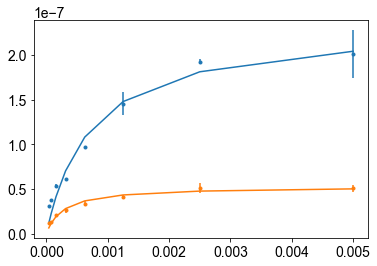

In [100]:
#Steady state
import pandas as pd
import numpy as np
plt.rcParams['font.size'] = '14'
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.rcParams['fontname'] = 'Arial'
def rateequation(concentration,km,vmax):
    return ((vmax*concentration)/(km+concentration))
df = pd.read_csv("steadystate.csv")
absorbances=np.genfromtxt("steadystate.csv",delimiter=",")
yvaluesperconc=df.groupby("Concentration").agg([np.mean, np.std])
from matplotlib import pyplot as plt 
yvaluesperconc.mLipA["mean"]
plt.errorbar(yvaluesperconc.index,yvaluesperconc.mLipA["mean"],yerr=yvaluesperconc.mLipA["std"],fmt=".",color="tab:orange")
plt.errorbar(yvaluesperconc.index,yvaluesperconc.pLipA["mean"],yerr=yvaluesperconc.pLipA["std"],fmt=".",color="tab:blue")
plt.plot(yvaluesperconc.index,rateequation(yvaluesperconc.index,0.0007259,156*1.5e-9),color="tab:blue")
plt.plot(yvaluesperconc.index,rateequation(yvaluesperconc.index,0.0002749,35.38*1.5e-9),color="tab:orange")
plt.savefig("steadystate.png",dpi=300)
#yvaluesperconc.plot()

<AxesSubplot:xlabel='Concentration', ylabel='pLipA'>

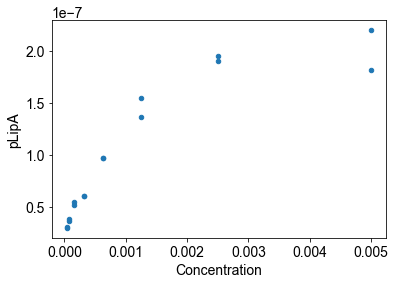

In [96]:
df.plot(x="Concentration",y="pLipA",kind="scatter")

array([[         nan,          nan,          nan],
       [5.000000e-03, 1.818742e-07, 4.829196e-08],
       [2.500000e-03, 1.907909e-07, 5.489080e-08],
       [1.250000e-03, 1.364476e-07, 3.933172e-08],
       [6.250000e-04, 9.694481e-08, 3.551739e-08],
       [3.125000e-04, 6.111007e-08, 2.857943e-08],
       [1.562500e-04, 5.536059e-08, 2.078900e-08],
       [7.812500e-05, 3.646008e-08, 1.244478e-08],
       [3.906250e-05, 3.003236e-08, 1.190965e-08],
       [5.000000e-03, 2.199521e-07, 5.320142e-08],
       [2.500000e-03, 1.948292e-07, 4.758571e-08],
       [1.250000e-03, 1.550432e-07, 4.315848e-08],
       [6.250000e-04, 9.752349e-08, 3.211685e-08],
       [3.125000e-04, 6.052517e-08, 2.445399e-08],
       [1.562500e-04, 5.158049e-08, 2.030676e-08],
       [7.812500e-05, 3.829569e-08, 1.341236e-08],
       [3.906250e-05, 3.130484e-08, 1.187232e-08]])

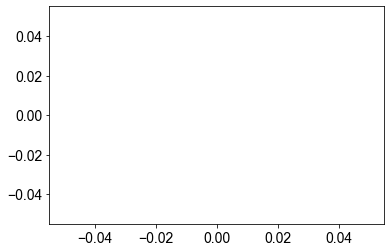

In [97]:
plt.clf()
plt.scatter(x=absorbances[0],y=absorbances[2])
yvalues=df
absorbances

In [98]:
156*1.5e-9

2.34e-07

In [99]:
plt.rcParams.keys()


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        